In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
X = data[data.columns[:-1]].values
y = data[data.columns[-1]].values

In [5]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [6]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [7]:
y_class = np.where(y<6, 0,1)

In [8]:
y_class

array([0, 0, 0, ..., 1, 0, 1])

In [9]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)

In [16]:
data.columns[:-1].to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

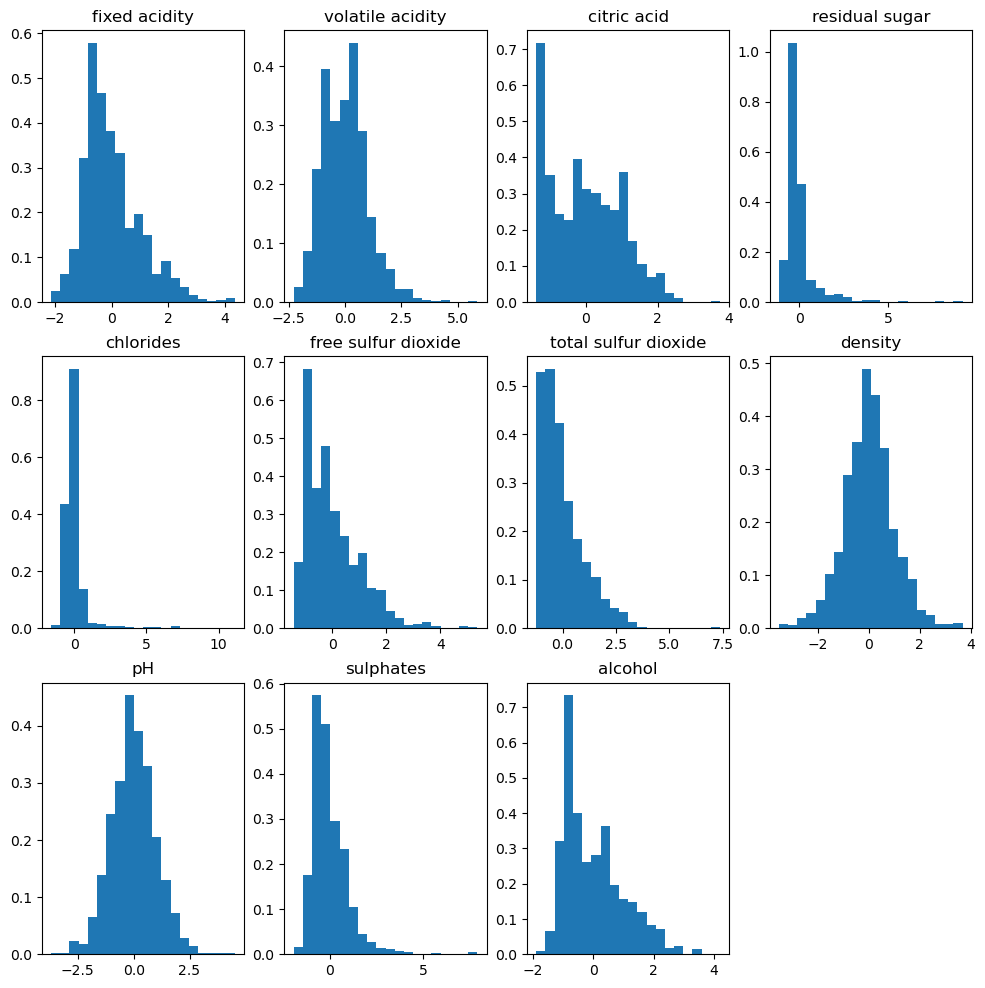

In [21]:
figure = plt.figure(figsize=(12,12))
for index, column in enumerate(data.columns[:-1].to_list()):
    ax = plt.subplot(3,4,index+1)
    ax.hist(X_std[:, index], bins=20, density=True, edgecolor=None)
    ax.set_title(column)

In [23]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y, test_size=0.3, random_state=0)

In [24]:
X_train.shape

(1119, 11)

In [25]:
y_train.shape

(1119,)